In [1]:
import pandas as pd
import numpy as np
import pickle

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score

from src.xg_boost import Xg_boost

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None 

### XG BOOST ON RANDOM_OVER_SAMPLE DATAFRAME

-----


In [2]:
df_over = pd.read_pickle('data/generated_data/cardio_processed_over.pkl')
df_over.head()

,age_category,BMI_category,BPMeds,prevalentStroke,prevalentHyp,diabetes,age,cigsPerDay,totChol,sysBP,BMI,heartRate,glucose,education_1.0,education_2.0,education_3.0,education_4.0,sex_F,sex_M,is_smoking_NO,is_smoking_YES,TenYearCHD
0,2.0,0.25,0,0,0,0,1.071429,0.15,-0.224138,0.722222,0.450931,1.000000,0.142857,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
1,0.5,0.25,0,0,1,0,-0.928571,0.00,-0.379310,1.462963,0.883744,-0.200000,-0.214286,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0
2,0.5,0.00,0,0,0,0,-0.214286,0.50,0.275862,-0.462963,-1.012582,0.866667,1.142857,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
3,0.5,0.25,0,0,1,0,0.071429,1.00,-0.017241,1.092593,0.579768,-0.466667,1.142857,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
4,2.0,0.25,0,0,0,0,1.071429,1.50,0.120690,0.296296,0.209361,-0.333333,-0.071429,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0


In [3]:
response_var = 'TenYearCHD'

In [4]:
xg_boost_over = Xg_boost(df_over, response_var)

In [5]:
xg_boost_pred = xg_boost_over.fit_model(60, 7, 1, 0.8)

In [6]:
with open ('data/predict_objects/xg_boost_pred.pkl','wb') as g:
    pickle.dump(xg_boost_pred, g)

In [7]:
xgb_over_results = xg_boost_over.get_metrics('OVER Xg Boost')
xgb_over_results

,accuracy,precision,recall,f1,kappa,set,model
0,0.923611,0.873684,0.985748,0.926339,0.847608,test,OVER Xg Boost
1,0.999256,0.999019,0.999509,0.999264,0.998511,train,OVER Xg Boost


In [8]:
xg_boost_over.create_df_feature_importance()

,predictor,importance
6,age,0.085936
16,education_4.0,0.079104
2,BPMeds,0.078455
9,sysBP,0.061968
0,age_category,0.059659
7,cigsPerDay,0.058186
13,education_1.0,0.056891
15,education_3.0,0.055266
17,sex_F,0.054367
14,education_2.0,0.053589


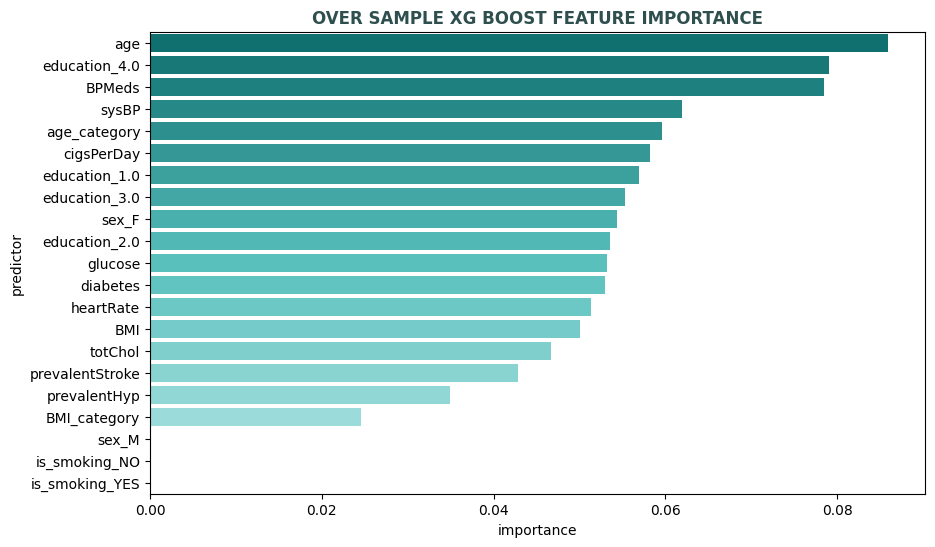

In [9]:
xg_boost_over.create_barplot_feature_importance('over sample')

###  XG BOOST  ON TOKEN_SMOTE DATAFRAME

-----


In [10]:
df_ts = pd.read_pickle('data/generated_data/cardio_processed_ts.pkl')
df_ts.head()

,age_category,BMI_category,BPMeds,prevalentStroke,prevalentHyp,diabetes,age,cigsPerDay,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0,sex_F,sex_M,is_smoking_NO,is_smoking_YES
0,2.0,0.25,0,0,0,0,1.071429,0.15,-0.224138,0.722222,0.450931,1.000000,0.142857,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.5,0.25,0,0,1,0,-0.928571,0.00,-0.379310,1.462963,0.883744,-0.200000,-0.214286,0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.5,0.00,0,0,0,0,-0.214286,0.50,0.275862,-0.462963,-1.012582,0.866667,1.142857,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.5,0.25,0,0,1,0,0.071429,1.00,-0.017241,1.092593,0.579768,-0.466667,1.142857,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,2.0,0.25,0,0,0,0,1.071429,1.50,0.120690,0.296296,0.209361,-0.333333,-0.071429,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [11]:
xg_boost_ts = Xg_boost(df_ts, response_var)

In [12]:
xg_boost_ts.fit_model()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [13]:
xgb_ts_results = xg_boost_ts.get_metrics('TS Xg Boost')
xgb_ts_results

,accuracy,precision,recall,f1,kappa,set,model
0,0.832842,0.333333,0.14094,0.198113,0.121628,test,TS Xg Boost
1,0.982722,1.000000,0.88674,0.939971,0.929922,train,TS Xg Boost


In [14]:
xg_boost_ts.create_df_feature_importance()

,predictor,importance
0,age_category,0.085903
6,age,0.082668
2,BPMeds,0.072899
17,sex_F,0.072008
15,education_3.0,0.067674
7,cigsPerDay,0.067089
14,education_2.0,0.065753
16,education_4.0,0.056182
9,sysBP,0.054568
12,glucose,0.050378


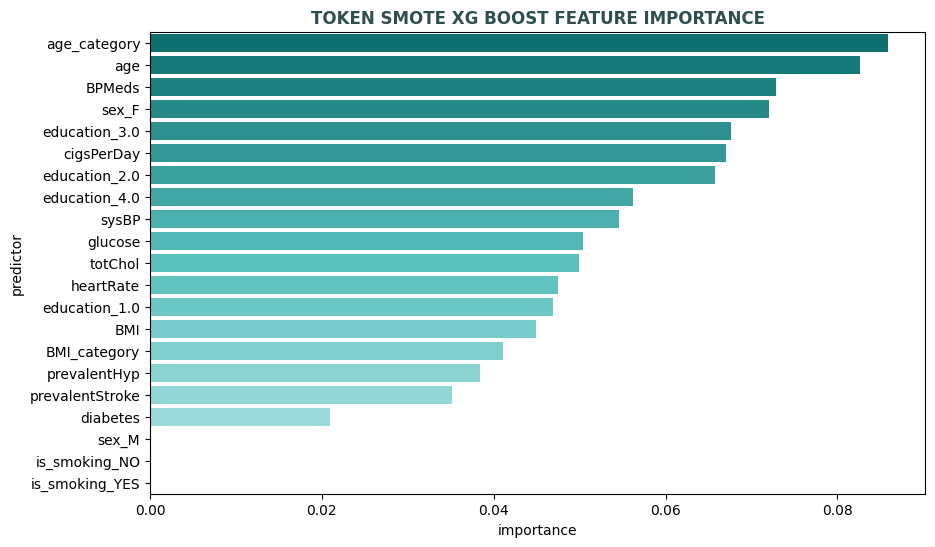

In [15]:
xg_boost_ts.create_barplot_feature_importance('token smote')

### SAVE RESULTS

-----

In [16]:
lr_dt_rf_results = pd.read_pickle('data/generated_data/LR_DT_RF_results.pkl')

In [17]:
all_results = pd.concat([lr_dt_rf_results, xgb_over_results, xgb_ts_results], axis = 0)
all_results

,accuracy,precision,recall,f1,kappa,set,model
0,0.695602,0.681193,0.705463,0.693116,0.391347,test,OVER Logistic Regression
1,0.654094,0.656448,0.662248,0.659335,0.308039,train,OVER Logistic Regression
0,0.860374,0.684211,0.087248,0.154762,0.125791,test,TS Logistic Regression
1,0.856300,0.744186,0.088398,0.158025,0.129837,train,TS Logistic Regression
0,0.710648,0.681915,0.761283,0.719416,0.422590,test,OVER Decision Tree Best
1,0.756079,0.738246,0.801669,0.768651,0.511638,train,OVER Decision Tree Best
0,0.852507,0.473684,0.060403,0.107143,0.076540,test,TS Decision Tree Best
1,0.853772,0.631579,0.099448,0.171838,0.135976,train,TS Decision Tree Best
0,0.797454,0.769737,0.833729,0.800456,0.595480,test,OVER Random Forest
1,0.845658,0.823207,0.884634,0.852816,0.691024,train,OVER Random Forest


We have achieved outstanding metrics in the Over_Sample Dataframe using this approach. However, overfitting remains unresolved. Regarding the Token_Smote Dataframe, our test metrics are still inadequate.

All our models perform significantly better on balanced dataframes when using the Random Over Sampler method compared to the TokenSMOTE method.

The XGBoost model achieved superior metrics on the test set; however, we have been unsuccessful in correcting the overfitting that occurs. Acceptable metrics were also obtained with the Random Forest model. Consequently, we will employ both models for our predictions and compare the results obtained by each.

In [18]:
all_results.to_pickle('data/generated_data/ALL_results.pkl')